In [40]:
import pandas as pd
import numpy as np

Importing data

In [41]:
data = pd.read_csv('./train.csv',
                 sep=',',
                 header=0)

In [42]:
print(len(data[data['NumMosquitos'] == 50]))

945


In [43]:
print(data.columns)

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent'],
      dtype='object')


In [73]:
df = data.groupby(by=['Date', 'Species', 'Trap', 'WnvPresent'], as_index=False)['NumMosquitos'].sum()

In [75]:
presence_of_wmv = df[['Species', 'WnvPresent']].copy().groupby(by=['Species']).max()

In [47]:
presence_of_wmv

,WnvPresent
Species,
CULEX ERRATICUS,0
CULEX PIPIENS,1
CULEX PIPIENS/RESTUANS,1
CULEX RESTUANS,1
CULEX SALINARIUS,0
CULEX TARSALIS,0
CULEX TERRITANS,0


There are only 2 species of mosquitos that can be a disease vector of WNV. They are: 'CULEX PIPIENS' and 'CULEX RESTUANS'

In [76]:
percentage_of_mosq = df[['Species', 'NumMosquitos', 'WnvPresent']].groupby(by=['Species', 'WnvPresent']).sum()

percentage_of_mosq = percentage_of_mosq['NumMosquitos'] / np.sum(percentage_of_mosq['NumMosquitos'])

percentage_of_mosq

Species                 WnvPresent
CULEX ERRATICUS         0             0.000060
CULEX PIPIENS           0             0.315847
                        1             0.056960
CULEX PIPIENS/RESTUANS  0             0.420957
                        1             0.052736
CULEX RESTUANS          0             0.144425
                        1             0.004947
CULEX SALINARIUS        0             0.000783
CULEX TARSALIS          0             0.000017
CULEX TERRITANS         0             0.003269
Name: NumMosquitos, dtype: float64

So almost every 6th and every 36th mosquito of 'CULEX PIPIENS' and 'CULEX RESTUANS' accordingly species is infected with WNV. Let's code the types of mosquitos that can be infected as 1 and 0 elsewhere. 

In [98]:
df = data

In [99]:
df['Species'] = np.where((df['Species'] == 'CULEX PIPIENS') | (df['Species'] == 'CULEX PIPIENS/RESTUANS') |
                         (df['Species'] == 'CULEX RESTUANS'), 1, 0)

In [100]:
df.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",1,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",1,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",1,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",1,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",1,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [101]:
weather_df = pd.read_csv('./weather.csv', 
                        sep=',',
                        header=0)

In [102]:
weather_df = weather_df.drop('CodeSum', axis=1)

Drop the CodeSum from the weather reports because it has only categorical values.

In [103]:
weather_df.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,Sunset,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,1849,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,-,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,1850,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,-,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,1851,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [104]:
weather_df['WetBulb'] = np.where(weather_df['WetBulb'] == 'M', 60, weather_df['WetBulb'])
weather_df['WetBulb'] = weather_df['WetBulb'].astype('int32')
weather_df['Tavg'] = np.mean(weather_df[['Tmax', 'Tmin']], axis=1)

Let's divide station's 1 data from station's 2 and join them horisontal

In [105]:
weather_stn1 = weather_df[weather_df['Station'] == 1]
weather_stn2 = weather_df[weather_df['Station'] == 2]
weather_stn1 = weather_stn1.drop('Station', axis=1)
weather_stn2 = weather_stn2.drop('Station', axis=1)
weather = weather_stn1.merge(weather_stn2, on='Date')

Fill up unknown variables with '-1' and drop them

In [106]:
weather = weather.replace('M', -1)
weather = weather.replace('-', -1)
weather = weather.replace('T', -1)
weather = weather.replace(' T', -1)
weather = weather.replace('  T', -1)
weather = weather.loc[:, (weather != -1).any(axis=0)]

Average all matching columns

In [107]:
weather['Tmax'] = ((weather['Tmax_x'] + weather['Tmax_y']) / 2)
weather['Tmin'] = (weather['Tmin_x'] + weather['Tmin_y']) / 2
weather['Tavg'] = (weather['Tavg_x'].astype('float32') + weather['Tavg_y'].astype('float32')) / 2
weather['DewPoint'] = (weather['DewPoint_x'] + weather['DewPoint_y']) / 2
weather['WetBulb'] = (weather['WetBulb_x'].astype('float32') + weather['WetBulb_y'].astype('float32')) / 2
weather['Heat'] = (weather['Heat_x'].astype('float32') + weather['Heat_y'].astype('float32')) / 2
weather['Cool'] = (weather['Cool_x'].astype('float32') + weather['Cool_y'].astype('float32')) / 2
weather['PrecipTotal'] = (weather['PrecipTotal_x'].astype('float32') + weather['PrecipTotal_y'].astype('float32')) / 2
weather['StnPressure'] = (weather['StnPressure_x'].astype('float32') + weather['StnPressure_y'].astype('float32')) / 2
weather['SeaLevel'] = (weather['SeaLevel_x'].astype('float32') + weather['SeaLevel_y'].astype('float32')) / 2
weather['ResultSpeed'] = (weather['ResultSpeed_x'].astype('float32') + weather['ResultSpeed_y'].astype('float32')) / 2
weather['ResultDir'] = (weather['ResultDir_x'].astype('float32') + weather['ResultDir_y'].astype('float32')) / 2
weather['AvgSpeed'] = (weather['AvgSpeed_x'].astype('float32') + weather['AvgSpeed_y'].astype('float32')) / 2

Set other columns to a float type

In [108]:
weather[['Sunset_x', 'Depart_x', 'Sunrise_x']] = \
    weather[['Sunset_x', 'Depart_x', 'Sunrise_x']].astype('float32')

Drop used columns

In [109]:
weather = weather.drop(['Tmax_x', 'Tmax_y', 'Tmin_x', 'Tmin_y', 'Tavg_x', 'Tavg_y', 'DewPoint_x',
                        'DewPoint_y', 'WetBulb_x', 'WetBulb_y', 'Cool_y', 'Cool_x', 'Heat_x',
                        'Heat_y', 'PrecipTotal_x', 'PrecipTotal_y', 'StnPressure_x', 'StnPressure_y',
                        'SeaLevel_x', 'SeaLevel_y', 'ResultSpeed_x', 'ResultSpeed_y', 'ResultDir_x',
                        'ResultDir_y', 'AvgSpeed_x', 'AvgSpeed_y', 'SnowFall_x', 'Depth_x'], axis=1)

Let's create a function to produce a lagged data(data that was represented certain days ago) 

In [110]:
def lagged(data_frame, column, lag):

    return data_frame[column].shift(lag)

In [111]:
weather['TmaxLag3'] = lagged(weather, 'Tmax', 3)
weather['TmaxLag7'] = lagged(weather, 'Tmax', 7)

weather['TminLag3'] = lagged(weather, 'Tmin', 3)
weather['TminLag7'] = lagged(weather, 'Tmin', 7)

weather['TavgLag3'] = lagged(weather, 'Tavg', 3)
weather['TavgLag7'] = lagged(weather, 'Tavg', 7)

In [112]:
weather.head()

,Date,Depart_x,Sunrise_x,Sunset_x,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,...,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,TmaxLag3,TmaxLag7,TminLag3,TminLag7,TavgLag3,TavgLag7
0,2007-05-01,14.0,448.0,1849.0,83.5,51.0,67.25,51.0,56.5,0.0,...,29.820000,2.200000,26.0,9.400000,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-05-02,-3.0,447.0,1850.0,59.5,42.5,51.00,42.0,47.0,13.5,...,30.084999,13.150000,3.0,13.400000,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-05-03,2.0,446.0,1851.0,66.5,47.0,56.75,40.0,49.0,8.0,...,30.120001,12.299999,6.5,12.549999,NaN,NaN,NaN,NaN,NaN,NaN
3,2007-05-04,4.0,444.0,1852.0,72.0,50.0,61.00,41.5,50.0,3.0,...,30.045000,10.250000,7.5,10.600000,83.5,NaN,51.0,NaN,67.25,NaN
4,2007-05-05,5.0,443.0,1853.0,66.0,53.5,59.75,38.5,49.5,5.0,...,30.095001,11.450000,7.0,11.750000,59.5,NaN,42.5,NaN,51.00,NaN


In [113]:
weather.columns

Index(['Date', 'Depart_x', 'Sunrise_x', 'Sunset_x', 'Tmax', 'Tmin', 'Tavg',
       'DewPoint', 'WetBulb', 'Heat', 'Cool', 'PrecipTotal', 'StnPressure',
       'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed', 'TmaxLag3',
       'TmaxLag7', 'TminLag3', 'TminLag7', 'TavgLag3', 'TavgLag7'],
      dtype='object')

Define functions to extract day and month from Date

In [114]:
def month(column):
    return column.split('-')[1]


def day(column):
    return column.split('-')[2]

In [115]:
weather['Month'] = weather['Date'].apply(month).astype('int32')
weather['Day'] = weather['Date'].apply(day).astype('int32')

In [116]:
weather.columns

Index(['Date', 'Depart_x', 'Sunrise_x', 'Sunset_x', 'Tmax', 'Tmin', 'Tavg',
       'DewPoint', 'WetBulb', 'Heat', 'Cool', 'PrecipTotal', 'StnPressure',
       'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed', 'TmaxLag3',
       'TmaxLag7', 'TminLag3', 'TminLag7', 'TavgLag3', 'TavgLag7', 'Month',
       'Day'],
      dtype='object')

In [119]:
merged_df = pd.merge(
    left=df,
    right=weather,
    on='Date',
    how='left'
)

In [120]:
merged_df.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,ResultDir,AvgSpeed,TmaxLag3,TmaxLag7,TminLag3,TminLag7,TavgLag3,TavgLag7,Month,Day
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",1,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,17.0,6.95,67.5,87.0,49.5,57.5,58.5,72.25,5,29
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",1,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,17.0,6.95,67.5,87.0,49.5,57.5,58.5,72.25,5,29
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",1,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,17.0,6.95,67.5,87.0,49.5,57.5,58.5,72.25,5,29
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",1,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,17.0,6.95,67.5,87.0,49.5,57.5,58.5,72.25,5,29
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",1,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,17.0,6.95,67.5,87.0,49.5,57.5,58.5,72.25,5,29


In [121]:
X, y = merged_df[[col for col in merged_df.columns if col != 'WnvPresent']],\
       merged_df['WnvPresent']

In [122]:
X[['Sunset_x', 'Depart_x', 'Sunrise_x']] = \
    X[['Sunset_x', 'Depart_x', 'Sunrise_x']].astype('float32')

In [125]:
X = X.drop(['Date', 'Trap', 'PrecipTotal', 'SeaLevel', 'Tmax', 'ResultDir', 'ResultSpeed',
            'Heat', 'StnPressure', 'DewPoint', 'WetBulb', 'Day', 'Month', 'AvgSpeed', 'TmaxLag3',
            'TmaxLag7', 'TminLag7', 'Tmin', 'Depart_x', 'Cool', 'Address', 'Block', 'Street',
            'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy'], axis=1)

In [139]:
def checker(X, y):
    from sklearn.metrics import roc_auc_score
    from sklearn.linear_model import LogisticRegression
    from matplotlib import pyplot as plt

    mdl = LogisticRegression().fit(X, y)
    
    original_auc = roc_auc_score(y, mdl.predict_proba(X)[:, 1])
    print('AUC оригинальной модели: ', original_auc)

    
    np.random.seed(21)

    
    diffs = []  
    for var in X.columns:
        X_test_upd = X.copy()  
        X_test_upd[var] = np.random.permutation(X_test_upd[var].values)  
        new_auc = roc_auc_score(y, mdl.predict_proba(X_test_upd)[:, 1])  
        diff = abs(new_auc - original_auc) / original_auc  
        diffs.append(diff)

    
    plt.bar(X.columns, diffs)
    plt.show()

/home/durnik/itea_dir/my_project_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


AUC оригинальной модели:  0.7753761397132516


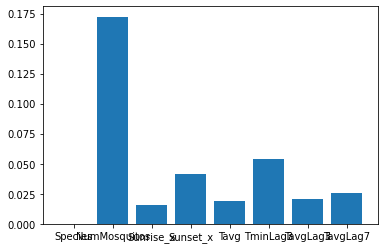

In [140]:
checker(X, y)

Model testing

Logistic Regression

In [126]:
def logistic_func(X, y):

    """
    :param X: data on what model should learn
    :param y: target function
    :return: AUC test
    """

    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import auc, roc_curve
    from sklearn.model_selection import train_test_split
    from matplotlib import pyplot as plt

    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.2,
        random_state=21
    )
    mdl = LogisticRegression().fit(X_train, y_train)  # оценим модель

    for var_name, coef_value in zip(X.columns, mdl.coef_[0]):
        print(var_name, ': ', coef_value)

    
    train_preds, test_preds = mdl.predict_proba(X_train)[:, 1], mdl.predict_proba(X_test)[:, 1]

    
    train_fpr, train_tpr, _ = roc_curve(y_train, train_preds)
    test_fpr, test_tpr, _ = roc_curve(y_test, test_preds)

    
    train_auc, test_auc = np.round(auc(train_fpr, train_tpr), 4), np.round(auc(test_fpr, test_tpr), 4)

    
    plt.plot(train_fpr, train_tpr, label=f'AUC на обучающем наборе: {train_auc}')
    plt.plot(test_fpr, test_tpr, label=f'AUC на тестовом наборе: {test_auc}')
    plt.legend()  
    plt.show()

Species :  0.006122225361894855
NumMosquitos :  0.03648181909589322
Sunrise_x :  0.004622858871415691
Sunset_x :  -0.006570205851706136
Tavg :  0.03327315616482783
TminLag3 :  0.04144755644250419
TavgLag3 :  -0.025510076306054275
TavgLag7 :  0.044618155046814025


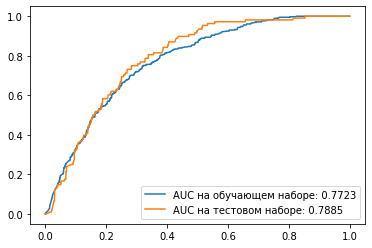

In [134]:
logistic_func(X, y)

In [146]:
np.random.seed(42)

Clasification Tree

In [165]:
def DTC(X, y):
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import roc_auc_score
    from sklearn.tree import DecisionTreeClassifier

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   
    mdl = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)

   
    predictions = mdl.predict_proba(X_test)
    auc = roc_auc_score(y_test, mdl.predict_proba(X_test)[:,1])
    print(auc)

In [166]:
DTC(X, y)

0.7917175680845024


Random Forest

In [157]:
def RFC(X, y):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import roc_auc_score
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    mdl = RandomForestClassifier(
        n_estimators=80,  
        criterion='gini',  
        max_depth=3,  
        min_samples_split=10,  
        min_samples_leaf=5,  
        max_features=0.8,  
        bootstrap=True,  
        max_samples=0.8,  
        random_state=42  
    )

    mdl = mdl.fit(X_train, y_train) 

    auc = roc_auc_score(y_test, mdl.predict_proba(X_test)[:,1])

    print(auc)

In [162]:
RFC(X, y)

0.8447414694780881


Boosting

In [142]:
def boosting(X, y, cv=0):

    import xgboost as xgb
    from sklearn.model_selection import train_test_split, GridSearchCV

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    dtrain = xgb.DMatrix(X_train, y_train)
    dtest = xgb.DMatrix(X_test, y_test)

    params = {
        'objective': 'binary:logistic',  # целевая функция, которую мы будем минимизировать
        'learning_rate': 0.1,  # параметр скорости обучения
        'subsample': 0.8,  # доля наблюдений, который будет использован в каждом дереве
        'colsample_bytree': 0.8,  # доля переменных, которая будет использована в каждом дереве
        'colsample_bylevel': 0.8,  # доля переменных, которая будет использована при каждой разбивке
        'lambda': 0.5,  # параметр L2 регуляризации
        'gamma': 1.,  # параметр регуляризации, который накладывает ограничение на размер дерева
        'max_depth': 4,  # максимальная глубина каждого дерева
        'min_child_weight': 3,  # параметр, определяющий минимальный размер листа
        'eval_metric': 'auc',  # метрика качества модели
        'silent': 1,  # выводить ли промежуточные вычисления на экран
        'seed': 42  # фиксация случайного состояния
    }

    mdl = xgb.train(
        params=params,
        dtrain=dtrain,
        num_boost_round=500,  
        early_stopping_rounds=20,  
        evals=[(dtrain, 'Train'), (dtest, 'Test')]
    )

   

    if cv == 1:

        cv_results = xgb.cv(
            params=params,
            dtrain=dtrain,
            num_boost_round=500,
            early_stopping_rounds=20,
            nfold=4, 
            verbose_eval=True  
        )

In [176]:
boosting(X, y)

[0]	Train-auc:0.79664	Test-auc:0.77166
Multiple eval metrics have been passed: 'Test-auc' will be used for early stopping.

Will train until Test-auc hasn't improved in 20 rounds.
[1]	Train-auc:0.84801	Test-auc:0.83871
[2]	Train-auc:0.85686	Test-auc:0.84439
[3]	Train-auc:0.86170	Test-auc:0.85937
[4]	Train-auc:0.86210	Test-auc:0.86036
[5]	Train-auc:0.86121	Test-auc:0.85627
[6]	Train-auc:0.85852	Test-auc:0.85132
[7]	Train-auc:0.86431	Test-auc:0.86266
[8]	Train-auc:0.86200	Test-auc:0.85688
[9]	Train-auc:0.86503	Test-auc:0.86342
[10]	Train-auc:0.86825	Test-auc:0.86324
[11]	Train-auc:0.86960	Test-auc:0.86567
[12]	Train-auc:0.87137	Test-auc:0.86780
[13]	Train-auc:0.87232	Test-auc:0.86725
[14]	Train-auc:0.87198	Test-auc:0.86653
[15]	Train-auc:0.87330	Test-auc:0.86655
[16]	Train-auc:0.87316	Test-auc:0.86774
[17]	Train-auc:0.87482	Test-auc:0.87263
[18]	Train-auc:0.87626	Test-auc:0.87052
[19]	Train-auc:0.87608	Test-auc:0.87111
[20]	Train-auc:0.87646	Test-auc:0.86964
[21]	Train-auc:0.87710	Test-a

In [177]:
boosting(X, y, 1)

[0]	Train-auc:0.79392	Test-auc:0.78493
Multiple eval metrics have been passed: 'Test-auc' will be used for early stopping.

Will train until Test-auc hasn't improved in 20 rounds.
[1]	Train-auc:0.84122	Test-auc:0.83694
[2]	Train-auc:0.85645	Test-auc:0.85962
[3]	Train-auc:0.86139	Test-auc:0.86951
[4]	Train-auc:0.86185	Test-auc:0.87008
[5]	Train-auc:0.85738	Test-auc:0.86405
[6]	Train-auc:0.85640	Test-auc:0.86281
[7]	Train-auc:0.86141	Test-auc:0.86746
[8]	Train-auc:0.85976	Test-auc:0.86563
[9]	Train-auc:0.86151	Test-auc:0.86856
[10]	Train-auc:0.86299	Test-auc:0.86820
[11]	Train-auc:0.86376	Test-auc:0.87172
[12]	Train-auc:0.86572	Test-auc:0.87414
[13]	Train-auc:0.86640	Test-auc:0.87430
[14]	Train-auc:0.86703	Test-auc:0.87485
[15]	Train-auc:0.86902	Test-auc:0.87619
[16]	Train-auc:0.86956	Test-auc:0.87492
[17]	Train-auc:0.87144	Test-auc:0.87806
[18]	Train-auc:0.87316	Test-auc:0.87936
[19]	Train-auc:0.87316	Test-auc:0.87870
[20]	Train-auc:0.87327	Test-auc:0.87893
[21]	Train-auc:0.87329	Test-a